In [ ]:
# @title Libraries

import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [ ]:
# @title Upload Dataset [DDAll]
#Cancel if already uploaded
from google.colab import files
uploaded = files.upload()

In [ ]:
# @title Download fonts
!wget 'https://github.com/openmaptiles/fonts/raw/master/roboto/Roboto-Light.ttf'
!wget 'https://github.com/openmaptiles/fonts/raw/master/roboto/Roboto-Regular.ttf'
!wget 'https://github.com/openmaptiles/fonts/raw/master/roboto/Roboto-Medium.ttf'
!wget 'https://github.com/openmaptiles/fonts/raw/master/roboto/Roboto-Bold.ttf'

--2025-12-08 07:43:24--  https://github.com/openmaptiles/fonts/raw/master/roboto/Roboto-Light.ttf
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/openmaptiles/fonts/master/roboto/Roboto-Light.ttf [following]
--2025-12-08 07:43:24--  https://raw.githubusercontent.com/openmaptiles/fonts/master/roboto/Roboto-Light.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162420 (159K) [application/octet-stream]
Saving to: ‘Roboto-Light.ttf.1’

Roboto-Light.ttf.1  100%[===================>] 158.61K  --.-KB/s    in 0.007s  

2025-12-08 07:43:24 (20.7 MB/s) - ‘Roboto-Light.ttf.1’ saved [162420/162420]

--20

In [ ]:
# @title Typesetting
# https://stackoverflow.com/a/65841091
from matplotlib import font_manager as fm, pyplot as plt

font_files = fm.findSystemFonts('.')

# Install fonts
for font_file in font_files:
  fm.fontManager.addfont(font_file)

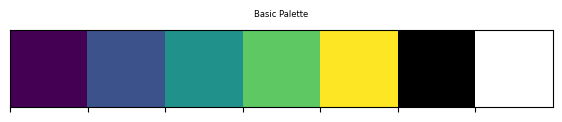

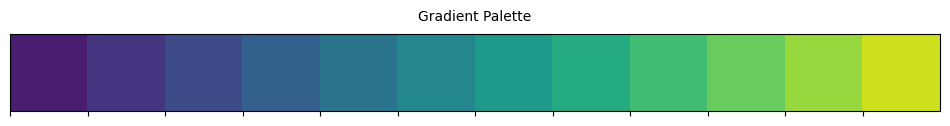

In [ ]:
# @title Colors
colors = ["#440154", "#3b528b", "#21918c", "#5ec962", "#fde725", "#000000", "#FFFFFF"]
colors_grad = sns.color_palette('viridis',  12)
colors_heat1 = sns.color_palette('viridis', as_cmap=True)

color_bg = "#1B181C"
color_text = "#FFFFFF"


sns.palplot(colors)
plt.gca().set_title('Basic Palette', fontsize=6, pad=10)

sns.palplot(colors_grad)
plt.gca().set_title('Gradient Palette', fontsize=10, pad=10)

plt.show()

In [ ]:
# @title Plot settings
mpl.rcParams['figure.dpi'] = 600
mpl.rcParams["figure.figsize"] = 16,8

# Text
mpl.rcParams['font.family'] = 'Roboto'

# Title
mpl.rcParams['figure.titlesize'] = 22
mpl.rcParams['axes.titlesize'] = 22
mpl.rcParams['axes.titleweight'] = 'bold'

# Labels
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18

# Spacing
mpl.rcParams['axes.titlepad'] = 72
mpl.rcParams['axes.labelpad'] = 10
mpl.rcParams['xtick.major.pad'] = 10
mpl.rcParams['ytick.major.pad'] = 10
mpl.rcParams['xtick.major.width'] = 0
mpl.rcParams['xtick.minor.width'] = 0
mpl.rcParams['ytick.major.width'] = 0
mpl.rcParams['ytick.minor.width'] = 0

# Spines and grids
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.grid'] = False

# Legends
mpl.rcParams['legend.title_fontsize'] = 18
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['legend.frameon'] = False

# Bars
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

# Colors
mpl.rcParams["figure.facecolor"] = color_bg
mpl.rcParams["axes.facecolor"] = color_bg
mpl.rcParams["savefig.facecolor"] = color_bg

# Text colors
mpl.rcParams['text.color'] = color_text
mpl.rcParams['axes.labelcolor'] = color_text
mpl.rcParams['xtick.color'] = color_text
mpl.rcParams['ytick.color'] = color_text

# Line colors
mpl.rcParams['axes.edgecolor'] = color_text

In [ ]:
# @title Setting Up Dataset
path = "/content/DDAll.csv"
df = pd.read_csv(path)
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

In [ ]:
df.head()

,Year,Month,Cases,Deaths,Date
0,2021,1,9124,40,2021-01-01
1,2021,2,6962,26,2021-02-01
2,2021,3,5894,14,2021-03-01
3,2021,4,3803,14,2021-04-01
4,2021,5,3883,16,2021-05-01


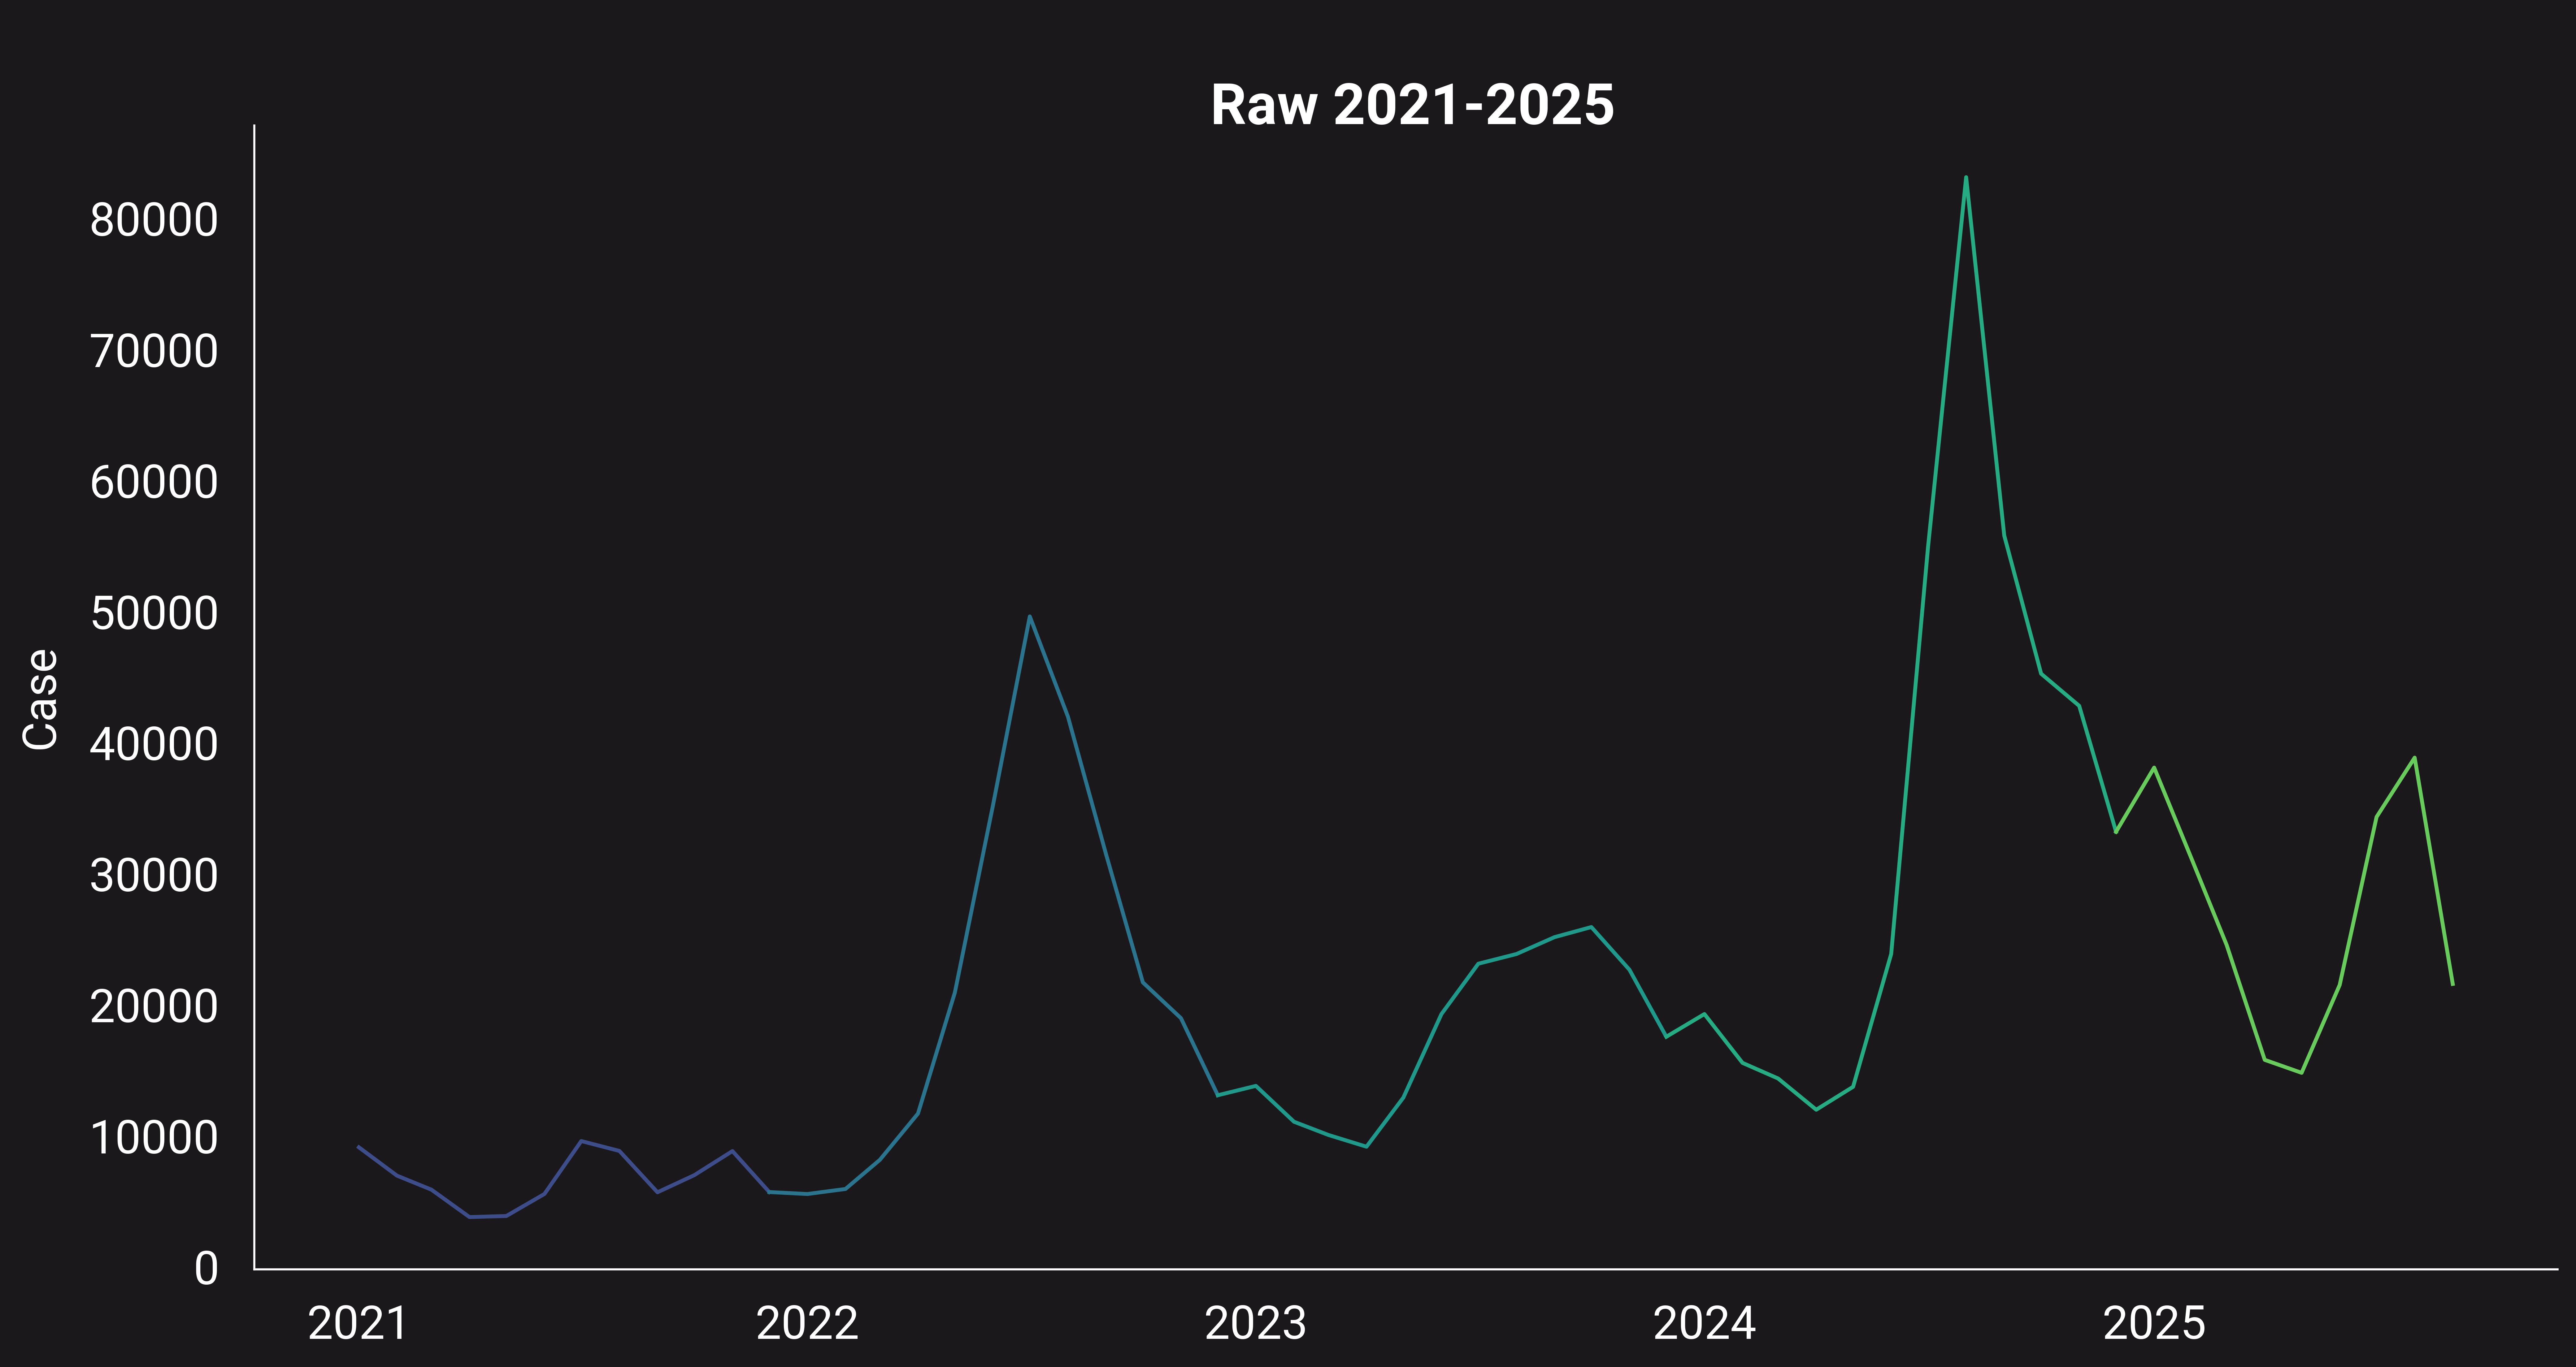

In [ ]:
f, ax = plt.subplots(figsize=(16, 8))

# Plot Monthly data per Year
for c, y in zip(range(df['Year'].nunique()), df['Year'].unique()):
  idx = df.index[df['Year'] == y].tolist()
  if min(idx)-1 > 0: idx.insert(0, min(idx)-1)
  df_y = df.iloc[idx]
  sns.lineplot(data=df_y, x='Date', y='Cases',
               ax=ax, color=colors_grad[round(c*1.8)+2], legend=False)

# Add titles, labels, and legends
ax.set(xlabel=None, ylabel='Case')
ax.set_title('\n Raw 2021-2025', pad=0.5, y= 1)

plt.show()

In [ ]:
# @title Seasonal Decomposition Analysis
from statsmodels.tsa.seasonal import seasonal_decompose

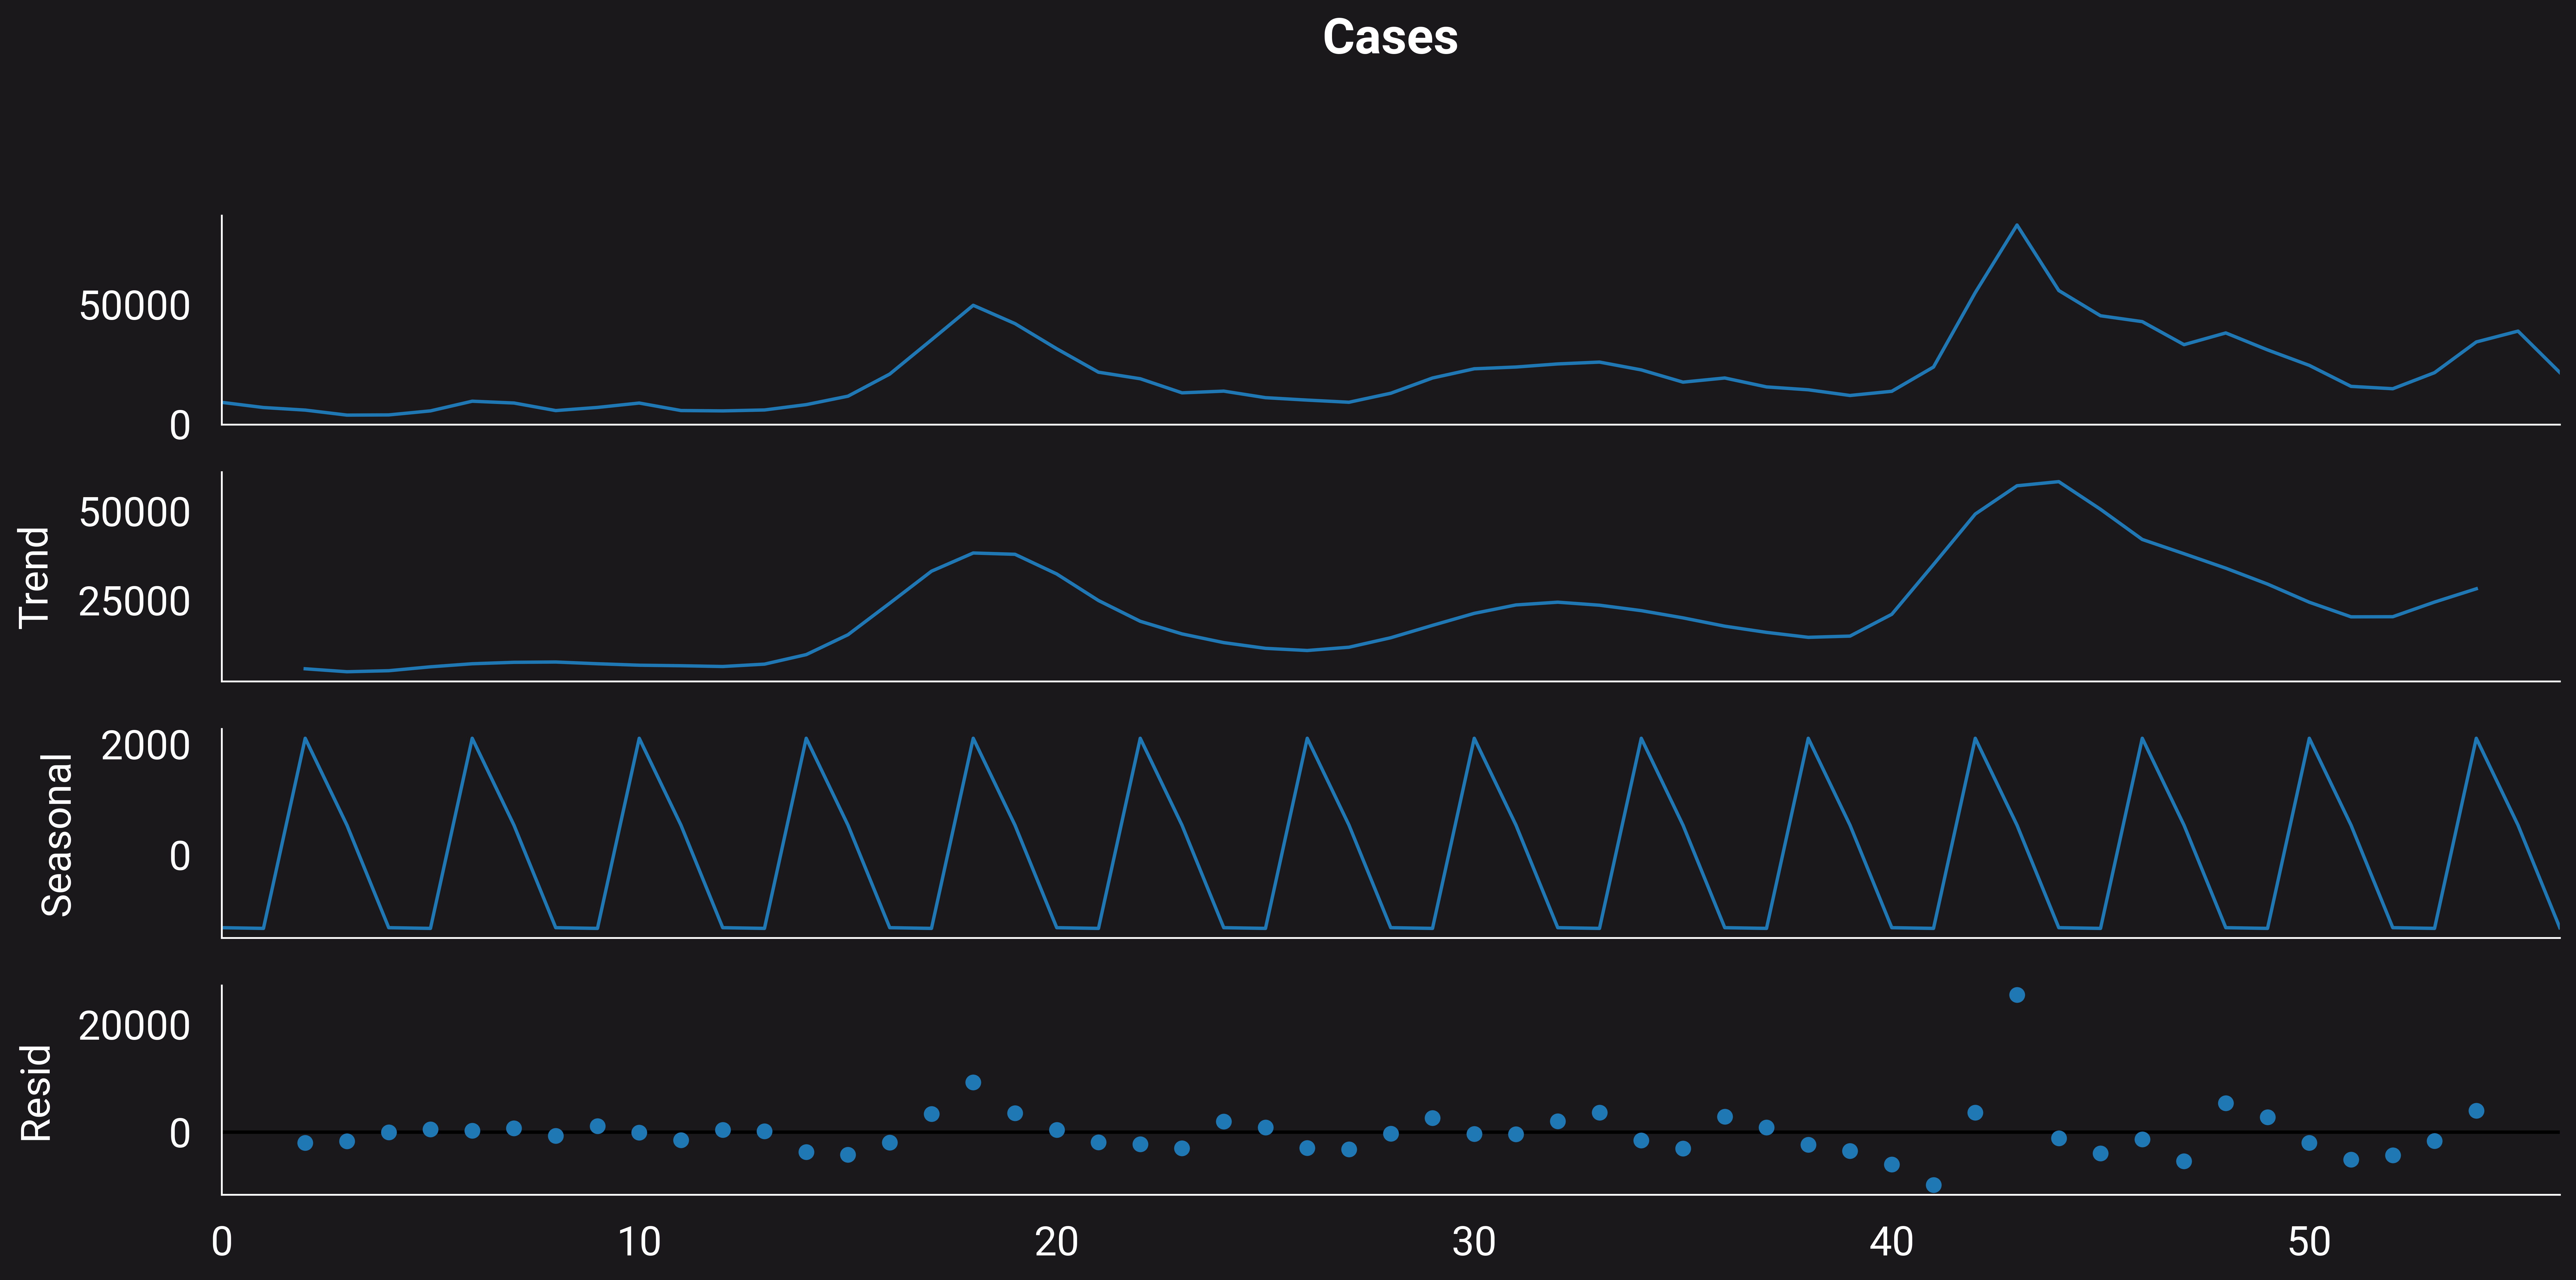

In [ ]:
results = seasonal_decompose(df['Cases'], period=4)
results.plot();

In [ ]:
# @title Preparing for Reccurent Neural Network

keep = ['Date', 'Cases']
new_f = df[keep]
new_f.to_csv("DC.csv", index=False)

path = "/content/DC.csv"
df = pd.read_csv(path, index_col='Date', parse_dates=True)

df.index.freq='MS'

In [ ]:
train = df.iloc[:48]
test = df.iloc[48:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df.head(), df.tail()

(            Cases
 Date             
 2021-01-01   9124
 2021-02-01   6962
 2021-03-01   5894
 2021-04-01   3803
 2021-05-01   3883,
             Cases
 Date             
 2025-05-01  14807
 2025-06-01  21514
 2025-07-01  34325
 2025-08-01  38851
 2025-09-01  21588)

In [ ]:
#Scale Data to between 0,1 to normalize for model
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train[:10]

array([[0.06707256],
       [0.03982   ],
       [0.02635759],
       [0.        ],
       [0.00100842],
       [0.02219785],
       [0.07308526],
       [0.0635809 ],
       [0.02383654],
       [0.0403116 ]])

In [ ]:
!pip install tensorflow
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size = 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
#Layer 1: Long Short Term Memory
#Layer 2: Densely Connected Neural Network
#Relu to ensure positive values
#Adamw optimiser with Mean Squared Error for loss
#Trained for 50 epochs

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adamw', loss='mse')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(generator, epochs = 50)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0602
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0344
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0324
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0297
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0540
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0343
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0276
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0231
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0436
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0165
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0201
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0214
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0150
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0245
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0254
Epoch 16/50
36/

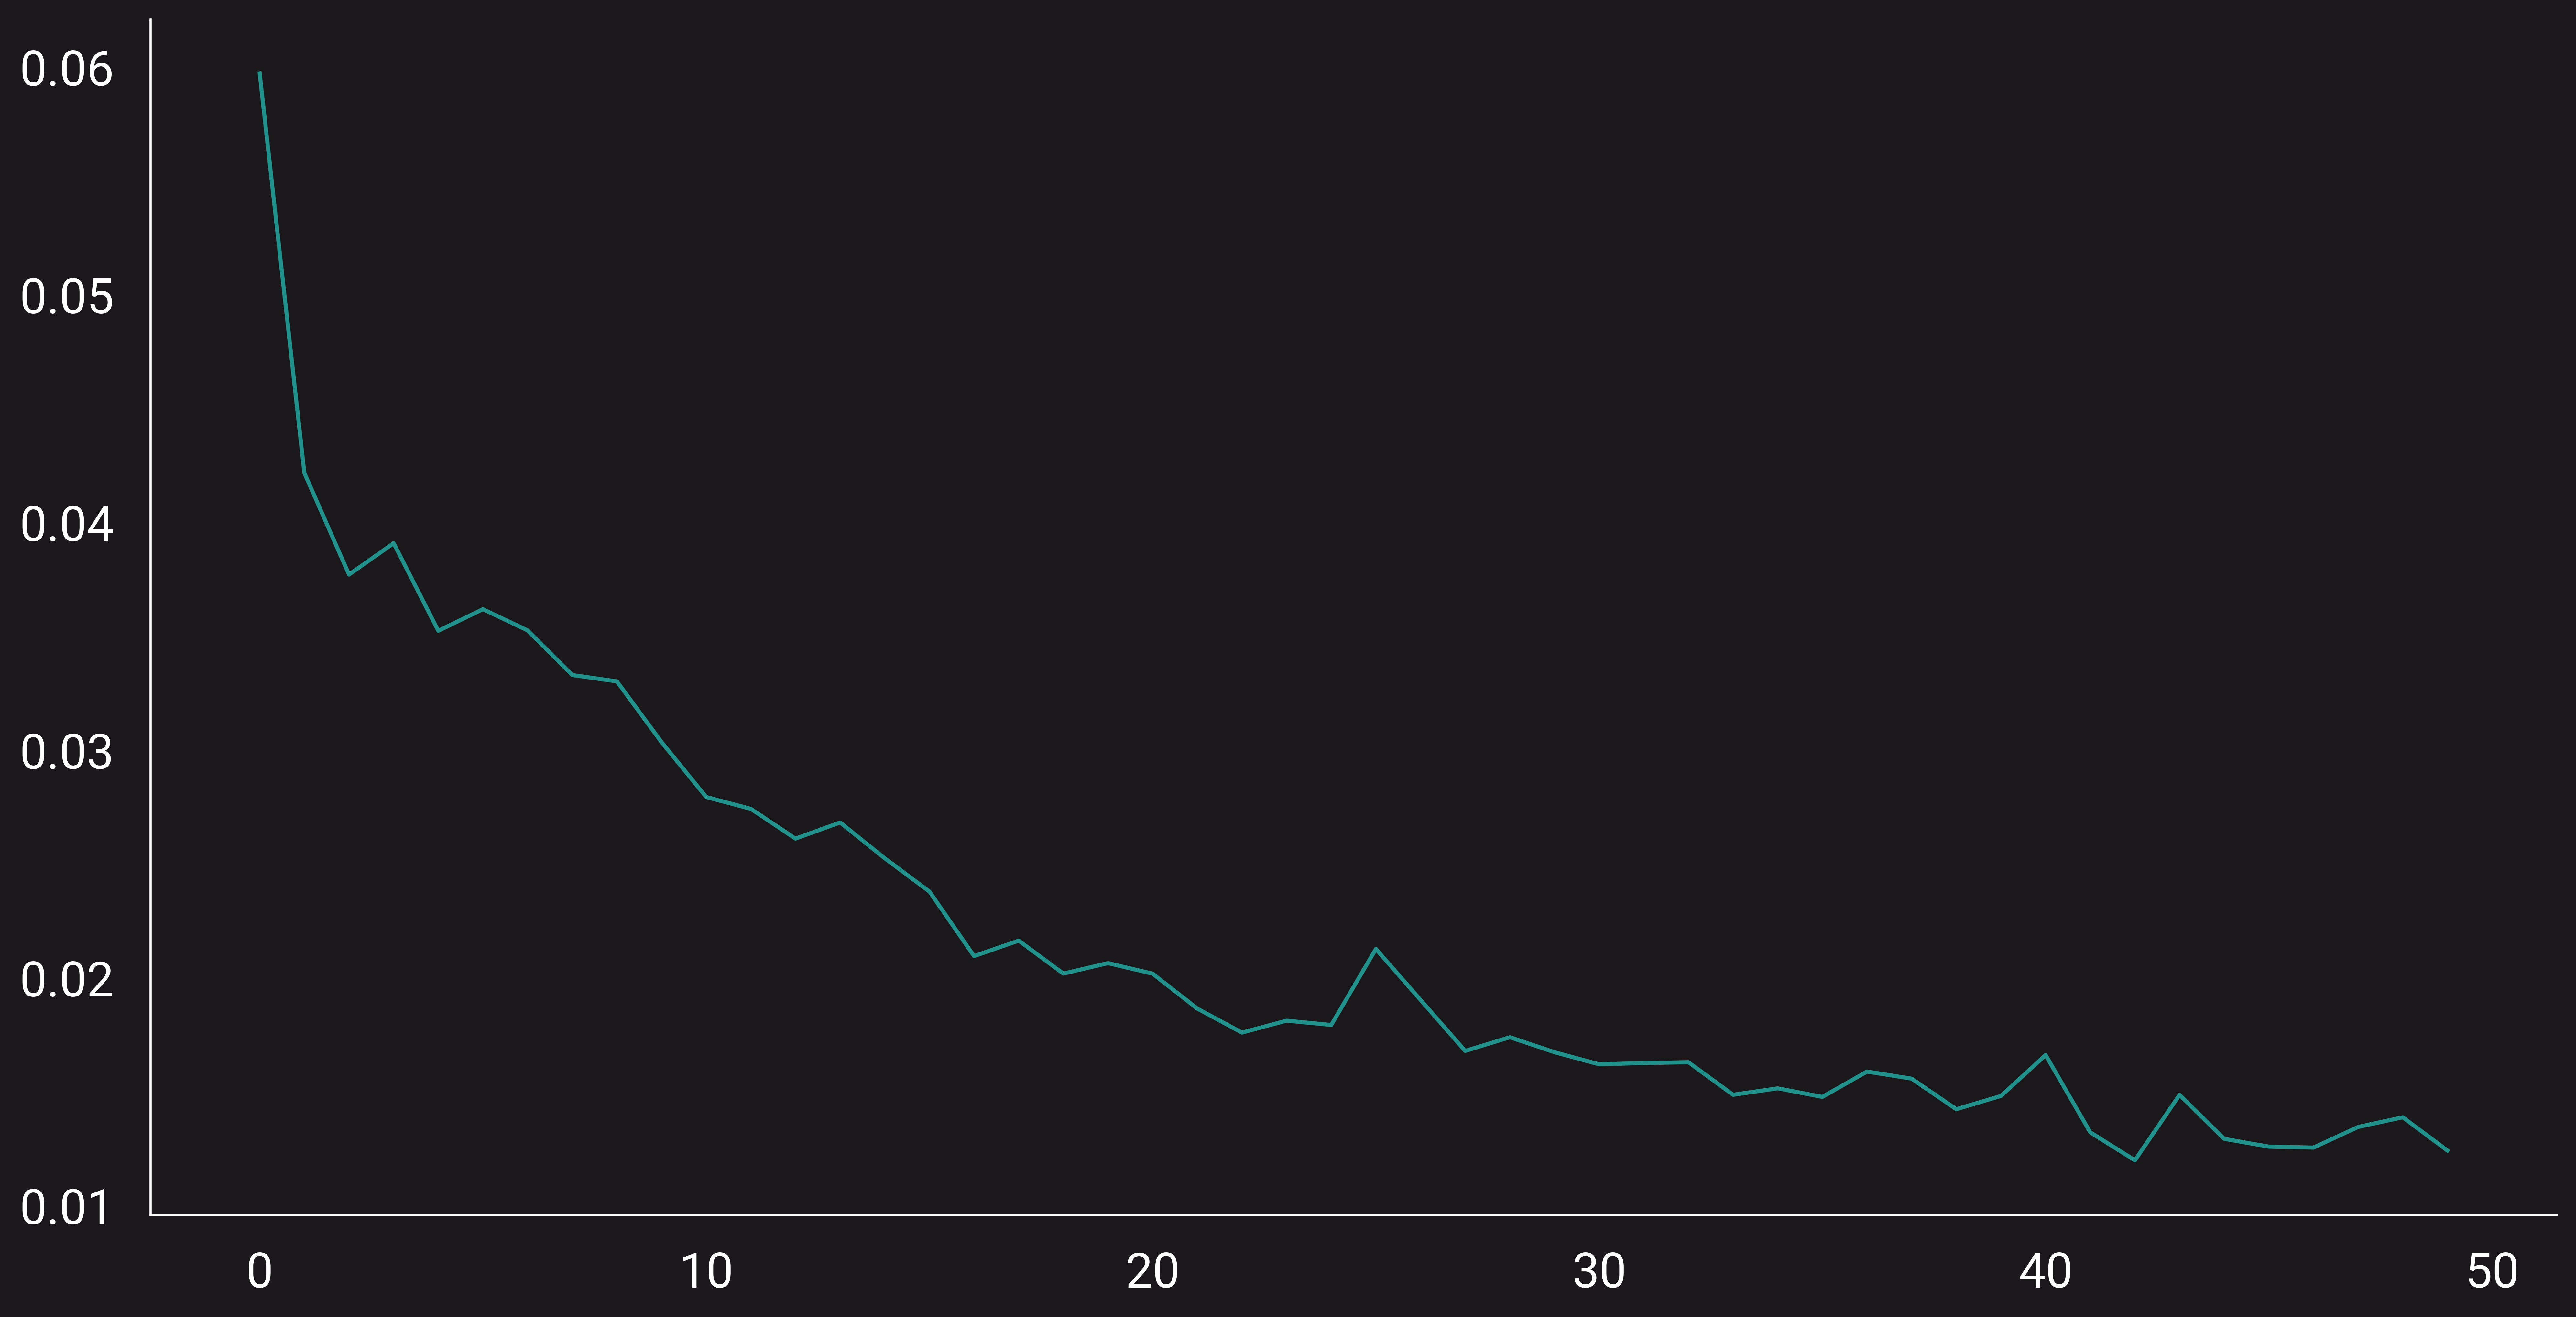

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch, color=colors[2])

In [ ]:
last_train_batch = scaled_train[-12:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
print(model.predict(last_train_batch))
print(scaled_test[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
[[0.2669128]]
[0.43220894]


In [ ]:
#Recurrent Neural Network
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

  #prediction val first batch
  current_pred = model.predict(current_batch)[0]

  #append to array
  test_predictions.append(current_pred)

  #use prediction to generate next prediction
  #remove first value from last prediction
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [ ]:
test_predictions

[array([0.2669128], dtype=float32),
 array([0.19063884], dtype=float32),
 array([0.14786571], dtype=float32),
 array([0.14181781], dtype=float32),
 array([0.1737364], dtype=float32),
 array([0.24315336], dtype=float32),
 array([0.322645], dtype=float32),
 array([0.3761981], dtype=float32),
 array([0.38652632], dtype=float32)]

/tmp/ipython-input-3699988885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='Date'>

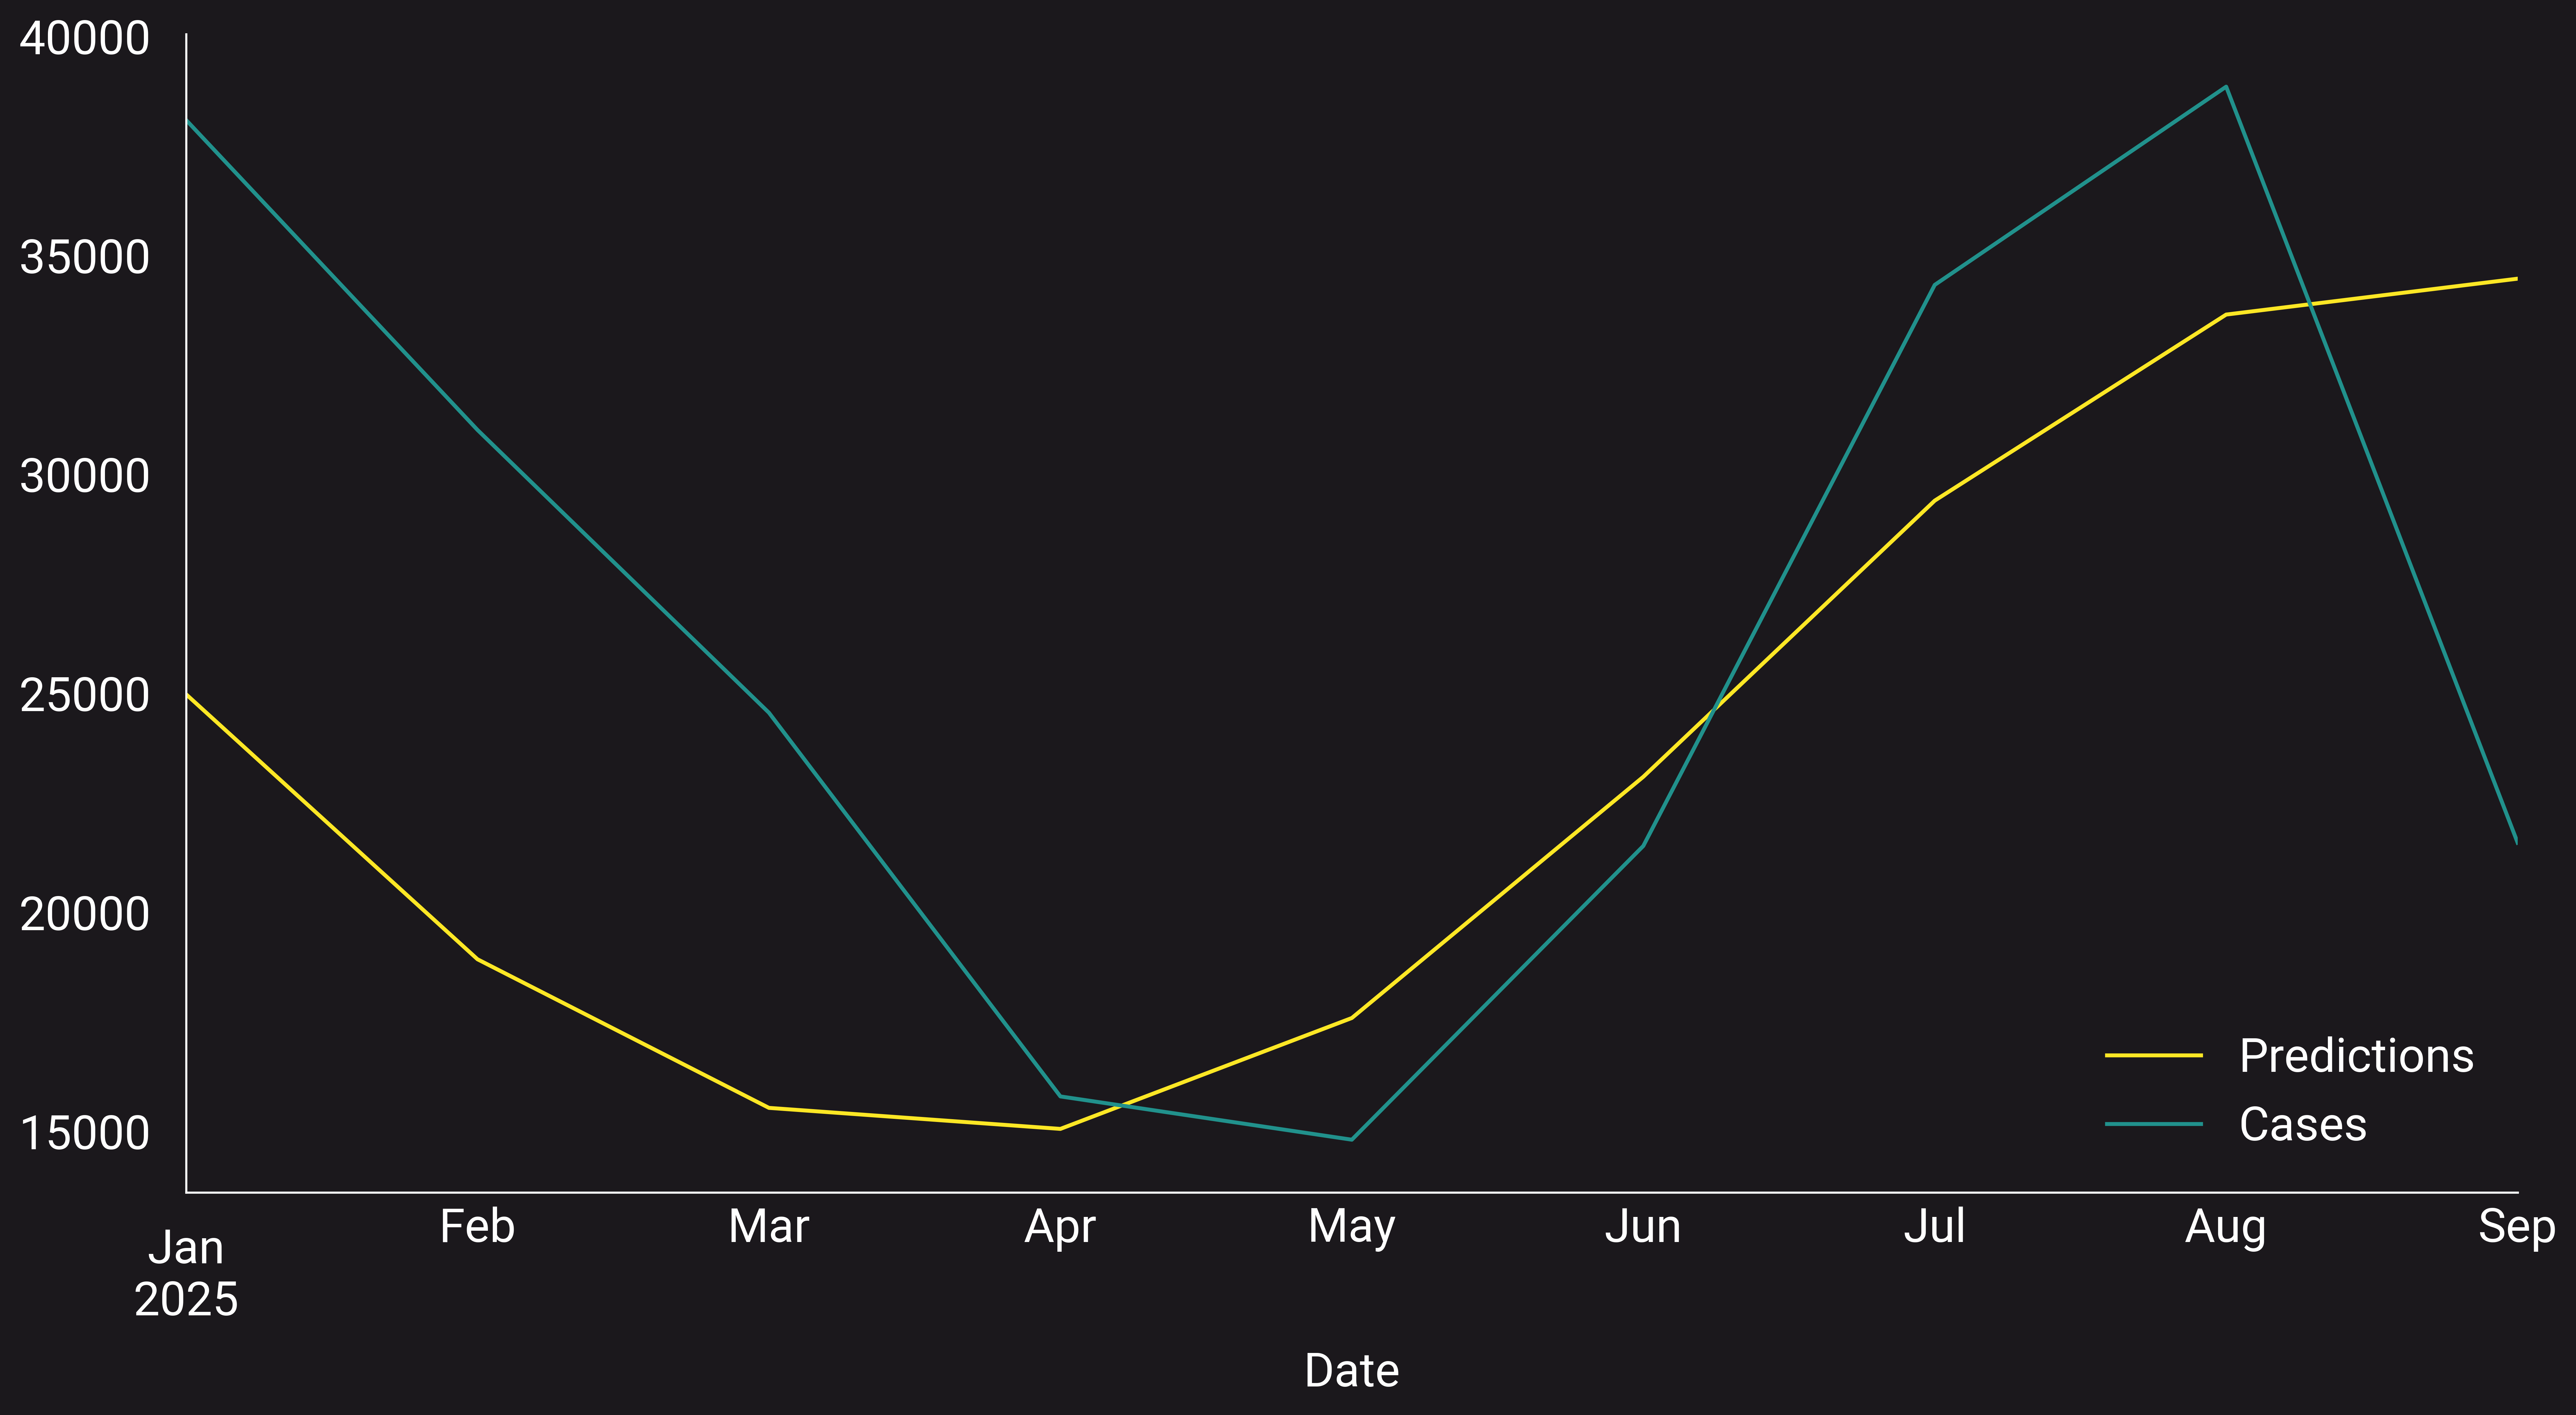

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions
test['Predictions'].plot(legend=True, color = colors[4])
test['Cases'].plot(legend=True, color = colors[2])

In [ ]:
test

,Cases,Predictions
Date,,
2025-01-01,38091,24977.725310
2025-02-01,31013,18926.760471
2025-03-01,24556,15533.482715
2025-04-01,15795,15053.690356
2025-05-01,14807,17585.855565
2025-06-01,21514,23092.842631
2025-07-01,34325,29399.073819
2025-08-01,38851,33647.548698
2025-09-01,21588,34466.905733


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test['Cases'], test['Predictions']))
print(rmse)

8349.398957604504
